In [6]:
import matplotlib.pyplot as plt

plt.figure(num=1, figsize=(5,4))

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

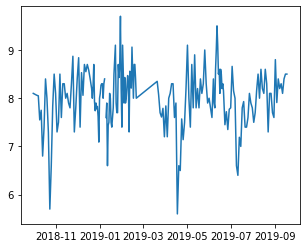

In [7]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
data = pd.read_csv('data/algae.csv', index_col='date', parse_dates=True, infer_datetime_format=True)
plt.figure(figsize=(5,4))
plt.plot(data['pH'])
plt.show()

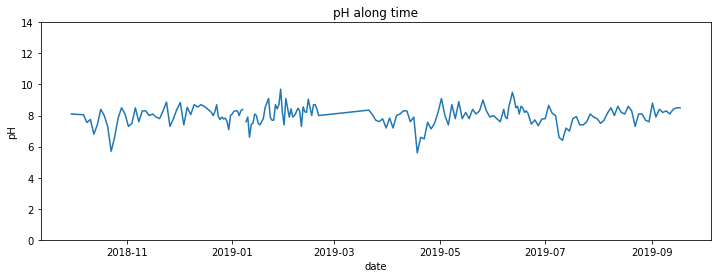

In [8]:
plt.figure(figsize=(12,4))
plt.ylim(0, 14)
plt.title('pH along time')
plt.xlabel('date')
plt.ylabel('pH')
plt.plot(data['pH'])
plt.show()

<Figure size 432x288 with 0 Axes>

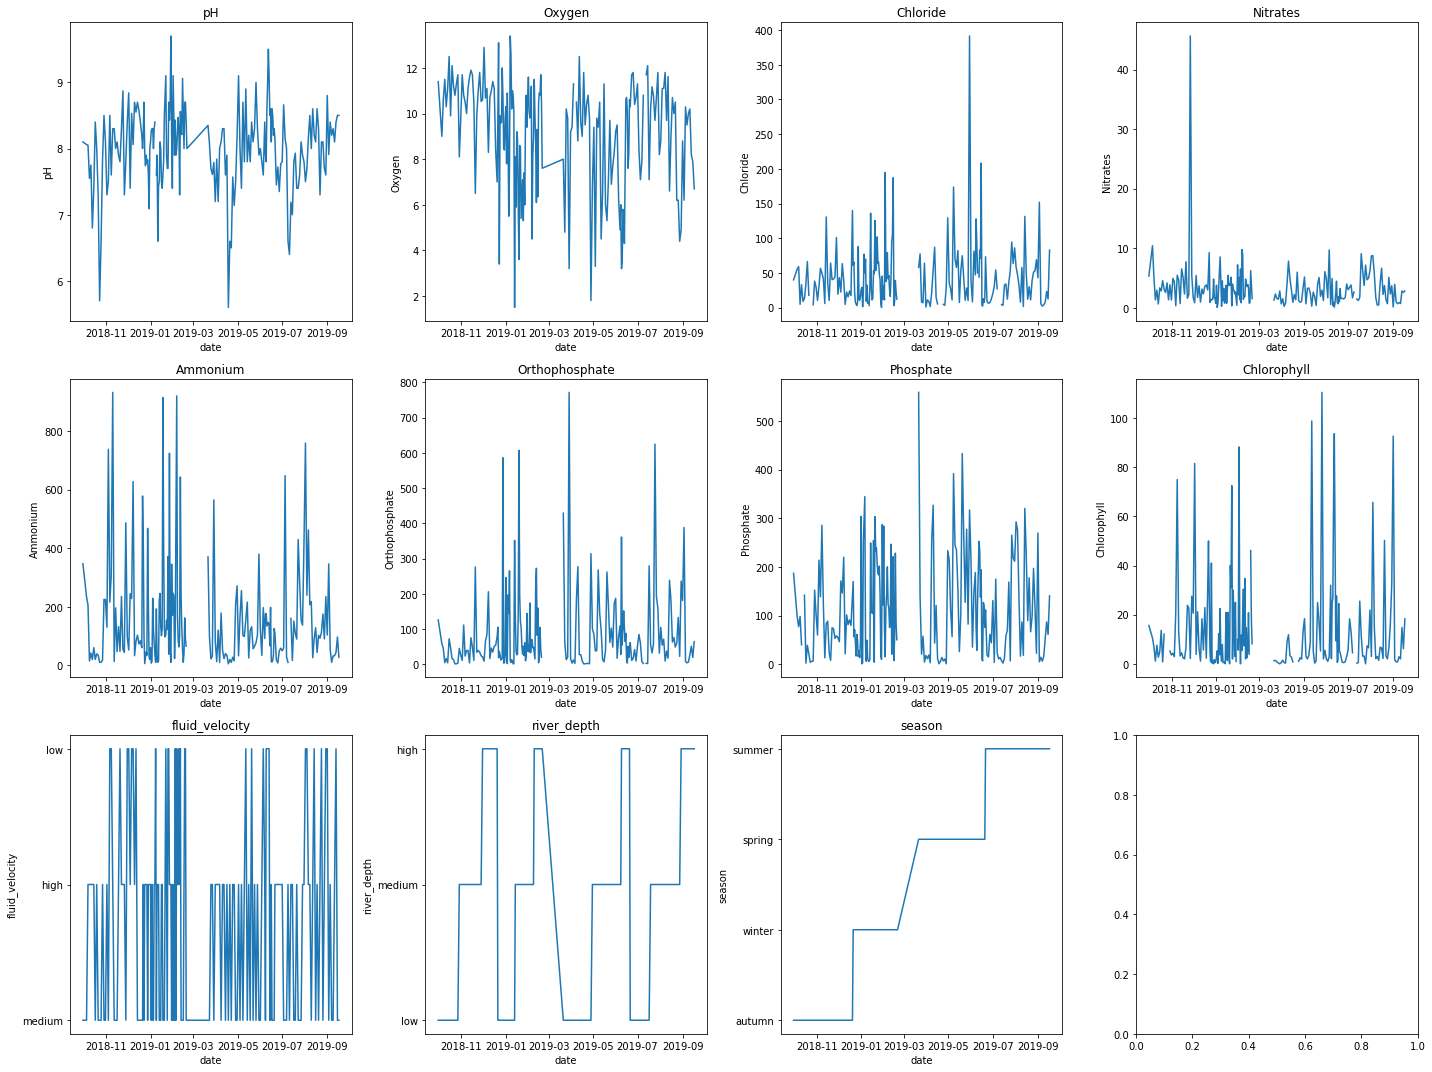

In [9]:
def choose_grid(nr):
    return nr // 4 + 1, 4

def line_chart(ax: plt.Axes, series: pd.Series, title: str, xlabel: str, ylabel: str, percentage=False):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)
    ax.plot(series)

(rows, cols) = choose_grid(data.shape[1])
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
i, j, n = 0, 0, 0

for col in data:
    line_chart(axs[i, j], data[col], col, 'date', col)
    n = n + 1
    i, j = (i + 1, 0) if n % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

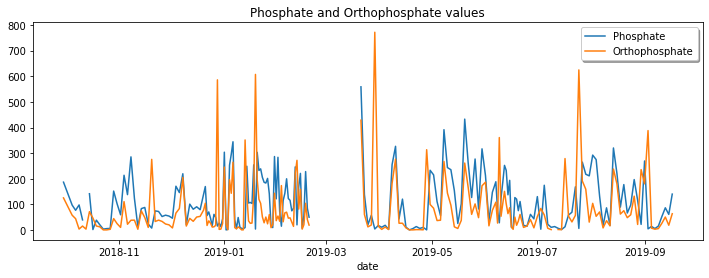

In [10]:
def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True)    

plt.figure(figsize=(12,4))
two_series = {'Phosphate': data['Phosphate'], 'Orthophosphate': data['Orthophosphate']}
multiple_line_chart(plt.gca(), data.index, two_series, 'Phosphate and Orthophosphate values', 'date', '')
plt.show()

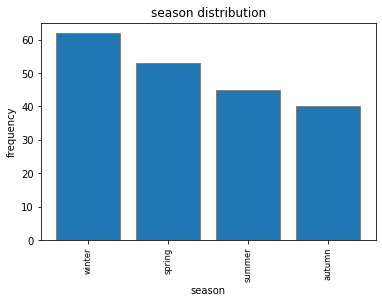

In [11]:
def bar_chart(ax: plt.Axes, xvalues: list, yvalues: list, title: str, xlabel: str, ylabel: str, percentage=False):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xvalues, rotation=90, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    ax.bar(xvalues, yvalues, edgecolor='grey')

plt.figure()    
counts = data['season'].value_counts()
bar_chart(plt.gca(), counts.index, counts.values, 'season distribution', 'season', 'frequency')
plt.show()

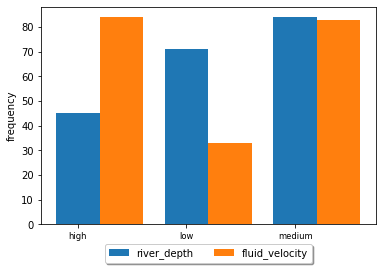

In [12]:
import numpy as np

def multiple_bar_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    x = np.arange(len(xvalues))  # the label locations
    ax.set_xticks(x)
    ax.set_xticklabels(xvalues, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    width = 0.8  # the width of the bars
    step = width / len(yvalues)
    k = 0
    for name, y in yvalues.items():
        ax.bar(x + k * step, y, step, label=name)
        k += 1
    ax.legend(loc='lower center', ncol=len(yvalues), bbox_to_anchor=(0.5, -0.2), fancybox = True, shadow = True)    

two_series = {'river_depth': data['river_depth'].value_counts().sort_index(), 
              'fluid_velocity': data['fluid_velocity'].value_counts().sort_index()}
plt.figure()
multiple_bar_chart(plt.gca(), ['high', 'low', 'medium'], two_series, '', '', 'frequency')
plt.show()